# Real estate price

In [2]:
import pandas as pd
df = pd.read_csv('Real estate.csv')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df = df.drop(['No','X5 latitude','X6 longitude'], axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [5]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    object 
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.3+ KB


In [7]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int32  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 14.7 KB


### Dataset Explanation

1. **X1 transaction date** (`int32`):  
   - Represents the year of the transaction, indicating when the real estate sale occurred.  
   - Example: 2012 or 2013.

2. **X2 house age** (`float64`):  
   - The age of the house in years at the time of the transaction.  
   - Example: 32.0 means the house is 32 years old.

3. **X3 distance to the nearest MRT station** (`float64`):  
   - The distance from the house to the nearest MRT station, measured in meters.  
   - Example: 84.87882 meters.

4. **X4 number of convenience stores** (`int64`):  
   - The number of convenience stores within a certain vicinity of the house.  
   - Example: 10 means there are 10 convenience stores nearby.

5. **Y house price of unit area** (`float64`):  
   - The price per unit area (e.g., per square meter) of the house during the transaction.  
   - Example: 37.9 means 37.9 currency units per square meter.


# Continue....

### Steps for Regression Analysis

#### **1. Split the Dataset**
- Split the data into **training (70%)** and **testing (30%)** subsets.
- Use the `train_test_split` function to ensure randomness in the split.
- Define:
  - **Features (X)**: `X1 transaction date`, `X2 house age`, `X3 distance to the nearest MRT station`, `X4 number of convenience stores`.
  - **Target (Y)**: `Y house price of unit area`.

#### **2. Check Correlation**
- Compute the correlation matrix to understand the relationships between features and the target variable.
- Visualize the correlation matrix using a **heatmap**:
  - Strong correlations between features and the target suggest potential predictors.
  - Identify multicollinearity (strong correlations between features), which might affect regression models.

#### **3. Apply Regression Models**

**a. Linear Regression**
1. Train a **Linear Regression** model using the training data.
2. Predict the target values using the testing data.

**b. Polynomial Regression**
1. Use `PolynomialFeatures` to generate polynomial terms for the features (e.g., degree = 2 or 3).
2. Train a **Linear Regression** model on the transformed polynomial features.
3. Predict the target values using the transformed testing data.

#### **4. Evaluate Model Performance**
- Evaluate both Linear and Polynomial Regression models using:
  1. **Mean Squared Error (MSE)**:
     - Measures the average squared difference between predicted and actual values.
     - Lower MSE indicates better performance.
  2. **R-squared (R²)**:
     - Measures how well the model explains the variability of the target variable.
     - Higher R² indicates better performance.
- Compare the results to determine which model performs better.

#### **5. Visualize Results**
- Plot **actual vs. predicted values** for both Linear and Polynomial Regression.
- For Polynomial Regression, visualize the curve fitting to see how well it models the data.


<br><br>
# -------------Starting From Here

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

warnings.filterwarnings('ignore')

### 1. Split the Dataset

In [15]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'Y house price of unit area'],
      dtype='object')

In [16]:
features_x = df.drop(labels='Y house price of unit area',axis=1)
target_y = df['Y house price of unit area']

In [17]:
features_x.shape, target_y.shape

((414, 4), (414,))

In [18]:
x_train,x_test, y_train,y_test = train_test_split(features_x,target_y, test_size=.30, random_state=232)

### 2. Check Correlation

In [20]:
df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
X1 transaction date,1.000000,0.049171,0.016519,-0.005586,0.081545
X2 house age,0.049171,1.000000,0.025622,0.049593,-0.210567
X3 distance to the nearest MRT station,0.016519,0.025622,1.000000,-0.602519,-0.673613
X4 number of convenience stores,-0.005586,0.049593,-0.602519,1.000000,0.571005
Y house price of unit area,0.081545,-0.210567,-0.673613,0.571005,1.000000


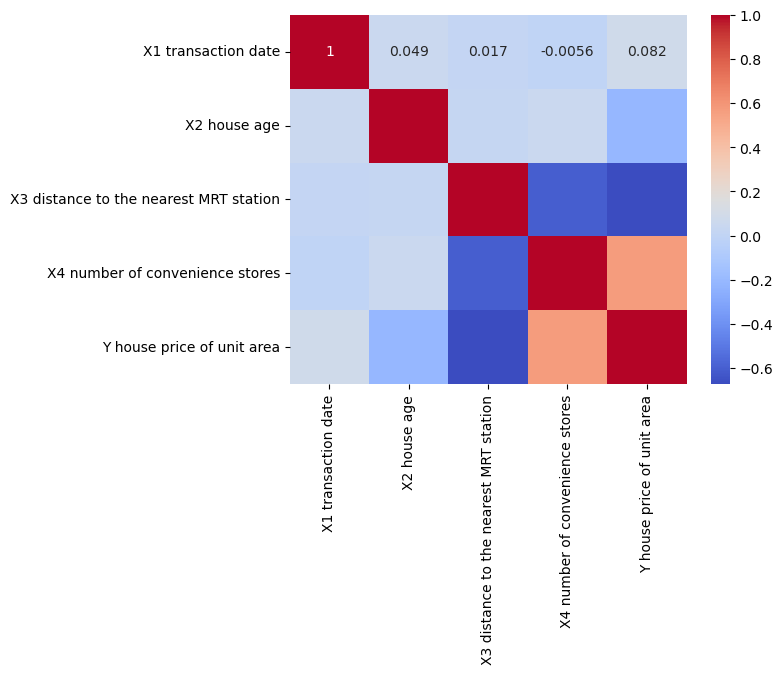

In [21]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

`transaction date` is almost not correlated with the target  

### 3. Apply Regression Models

#### a. Linear Regrssion

In [25]:
reg = LinearRegression()

In [26]:
reg.fit(x_train,y_train)

LinearRegression()

In [27]:
y_test_reg_pred  = reg.predict(x_test)

In [28]:
train_acc = reg.score(x_train, y_train)
test_acc = reg.score(x_test, y_test)
print('Train Accurecy: ',train_acc*100)
print('Test Accurecy: ', test_acc*100)

Train Accurecy:  54.42537335394252
Test Accurecy:  56.658269595809216


<br><br>
#### b. Polynomial Regression

In [30]:
ploy_f = PolynomialFeatures(degree=2)

In [31]:
x_train_pf = ploy_f.fit_transform(x_train)
x_test_pf = ploy_f.fit_transform(x_test)

In [32]:
pd.DataFrame(x_train_pf).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,2013.0,4.3,432.0385,7.0,4052169.0,8655.9,869693.5005,14091.0,18.49,1857.76555,30.1,186657.265482,3024.2695,49.0
1,1.0,2013.0,33.9,157.6052,7.0,4052169.0,68240.7,317259.2676,14091.0,1149.21,5342.81628,237.3,24839.399067,1103.2364,49.0


In [33]:
ploy_reg = LinearRegression()

In [34]:
ploy_reg.fit(x_train_pf,y_train)

LinearRegression()

In [35]:
y_test_ploy_reg_pred = ploy_reg.predict(x_test_pf)

In [36]:
print("\nTrain Accurecy: ",r2_score(y_train, ploy_reg.predict(x_train_pf))*100)
print("\nTest Accurecy: ",r2_score(y_test, y_test_ploy_reg_pred)*100)



Train Accurecy:  62.59539039086748

Test Accurecy:  64.46002315455442


### 4. Evaluate Model Performance

#### MSE

In [39]:
print("Linear Regression MSE: \t\t",mean_squared_error(y_test, y_test_reg_pred))
print("Polynomial Regression MSE: \t",mean_squared_error(y_test, y_test_ploy_reg_pred))

Linear Regression MSE: 		 76.98424338948362
Polynomial Regression MSE: 	 63.12664958254289


#### R2 Score

In [41]:
print('\n--------Linear Regression R2 Score--------\n')
print('Train Score: \t\t',r2_score(y_train, reg.predict(x_train))*100)
print('Test Score: \t\t', r2_score(y_test, reg.predict(x_test))*100)
print('\n\n--------Polynomial Regression R2 Score--------\n')
print("Train Score: \t\t",r2_score(y_train, ploy_reg.predict(x_train_pf))*100)
print("Test Score: \t\t",r2_score(y_test, y_test_ploy_reg_pred)*100)



--------Linear Regression R2 Score--------

Train Score: 		 54.42537335394252
Test Score: 		 56.658269595809216


--------Polynomial Regression R2 Score--------

Train Score: 		 62.59539039086748
Test Score: 		 64.46002315455442


## 5. Visualize Results

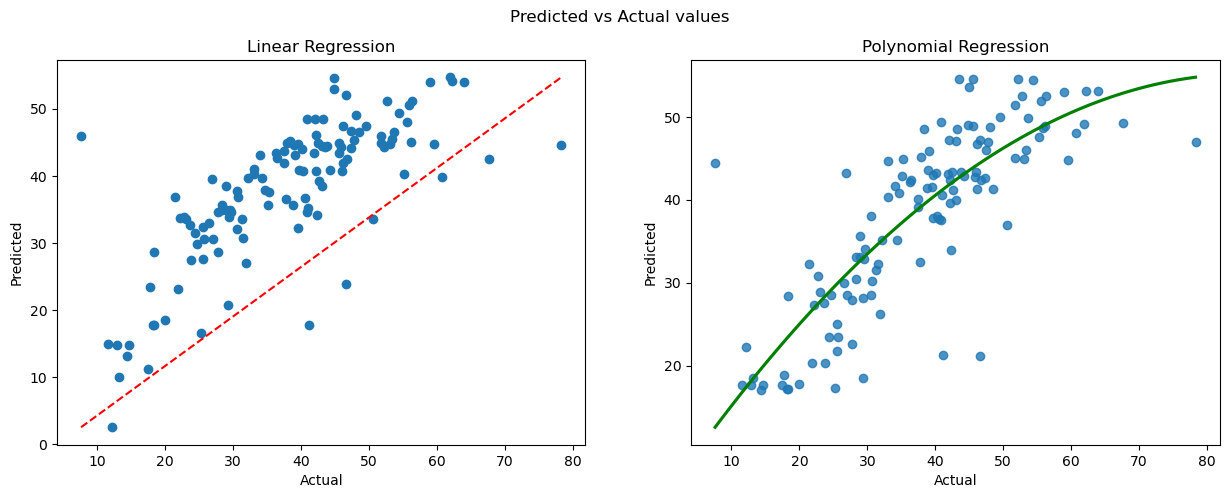

In [43]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_test_reg_pred)
plt.plot([y_test.min(), y_test.max()],[y_test_reg_pred.min(),y_test_reg_pred.max()],  'r--')
plt.title("Linear Regression")
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=pd.DataFrame(y_test_ploy_reg_pred), ci=None, order=2,line_kws={'color':'green'})
# plt.scatter(y_test, y_test_ploy_reg_pred)
# plt.plot([y_test.min(), y_test.max()],[y_test_ploy_reg_pred.min(),y_test_ploy_reg_pred.max()],  'r--')
plt.title("Polynomial Regression")
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.suptitle('Predicted vs Actual values')
plt.show()